In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [8]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
#total of rows x columns
df.shape

(101766, 50)

In [10]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [11]:
#checking for null values
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [12]:
#subset of data I want to consider
df2= df[['race', 'gender', 'age', 'time_in_hospital', 'payer_code', 'num_procedures', 'num_medications', 'diabetesMed', 'readmitted']]

In [11]:
#header view of subsetted data set
df2.head()

,race,gender,age,time_in_hospital,payer_code,num_procedures,num_medications,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,?,0,1,No,NO
1,Caucasian,Female,[10-20),3,?,0,18,Yes,>30
2,AfricanAmerican,Female,[20-30),2,?,5,13,Yes,NO
3,Caucasian,Male,[30-40),2,?,1,16,Yes,NO
4,Caucasian,Male,[40-50),1,?,0,8,Yes,NO


In [12]:
#dropped all missing data
df2.dropna()

,race,gender,age,time_in_hospital,payer_code,num_procedures,num_medications,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,?,0,1,No,NO
1,Caucasian,Female,[10-20),3,?,0,18,Yes,>30
2,AfricanAmerican,Female,[20-30),2,?,5,13,Yes,NO
3,Caucasian,Male,[30-40),2,?,1,16,Yes,NO
4,Caucasian,Male,[40-50),1,?,0,8,Yes,NO
...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,MC,0,16,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,MC,3,18,Yes,NO
101763,Caucasian,Male,[70-80),1,MC,0,9,Yes,NO
101764,Caucasian,Female,[80-90),10,MC,2,21,Yes,NO


In [13]:
#confirming no null values left
df2.isnull().sum()

race                0
gender              0
age                 0
time_in_hospital    0
payer_code          0
num_procedures      0
num_medications     0
diabetesMed         0
readmitted          0
dtype: int64

In [14]:
#gender counts is showing we have more female than male patients
df2.groupby(['gender'])['gender'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [15]:
#group of initial comparison is Females between the ages of 40-50 years old
df2.loc[(df['gender'].str.contains('F') & (df['age']=='[40-50)'))]

,race,gender,age,time_in_hospital,payer_code,num_procedures,num_medications,diabetesMed,readmitted
10,AfricanAmerican,Female,[40-50),9,?,2,17,Yes,>30
12,Caucasian,Female,[40-50),7,?,0,15,Yes,<30
45,Caucasian,Female,[40-50),2,?,3,8,Yes,NO
52,AfricanAmerican,Female,[40-50),8,?,2,17,Yes,>30
62,AfricanAmerican,Female,[40-50),3,?,0,15,Yes,>30
...,...,...,...,...,...,...,...,...,...
101676,Caucasian,Female,[40-50),2,CP,6,15,Yes,NO
101737,Caucasian,Female,[40-50),4,CP,4,25,Yes,NO
101748,Caucasian,Female,[40-50),14,MD,0,16,Yes,>30
101752,Other,Female,[40-50),3,HM,1,5,Yes,NO


In [16]:
#50 % of these women ages 40-50 yrs old had a stay of 3 days in the hospital, one procedure and 15 medications
df2.loc[(df['gender'].str.contains('F') & (df['age']=='[40-50)'))].describe()

,time_in_hospital,num_procedures,num_medications
count,4811.000000,4811.000000,4811.000000
mean,4.084182,1.293078,15.950946
std,2.875190,1.618806,7.912416
min,1.000000,0.000000,1.000000
25%,2.000000,0.000000,10.000000
50%,3.000000,1.000000,15.000000
75%,5.000000,2.000000,20.000000
max,14.000000,6.000000,64.000000


In [17]:
#their average time in the hospital is 4 days, average of 1 procedure and 15 medications
df2.loc[(df['gender'].str.contains('F') & (df['age']=='[40-50)'))].mean()

time_in_hospital     4.084182
num_procedures       1.293078
num_medications     15.950946
dtype: float64

In [25]:
#payer stats show there are 18 unique payers, with top payer being unknown
df2['payer_code'].describe()

count     101766
unique        18
top            ?
freq       40256
Name: payer_code, dtype: object

In [18]:
#readmission counts by age groups shows higher counts with the eldery aged groups
df2.groupby(['age', 'readmitted'])['gender'].count()

age       readmitted
[0-10)    <30               3
          >30              26
          NO              132
[10-20)   <30              40
          >30             224
          NO              427
[20-30)   <30             236
          >30             510
          NO              911
[30-40)   <30             424
          >30            1187
          NO             2164
[40-50)   <30            1027
          >30            3278
          NO             5380
[50-60)   <30            1668
          >30            5917
          NO             9671
[60-70)   <30            2502
          >30            7897
          NO            12084
[70-80)   <30            3069
          >30            9475
          NO            13524
[80-90)   <30            2078
          >30            6223
          NO             8896
[90-100)  <30             310
          >30             808
          NO             1675
Name: gender, dtype: int64

In [33]:
#readmissions counts by payer show an unknown payer (?) and MC(Medicare) have the higher counts of readmissions & 
#NO readsmissions

df2.groupby(['payer_code', 'readmitted'])['payer_code'].count()

payer_code  readmitted
?           <30            4627
            >30           13828
            NO            21801
BC          <30             426
            >30            1301
            NO             2928
CH          <30              13
            >30              33
            NO              100
CM          <30             198
            >30             661
            NO             1078
CP          <30             214
            >30             781
            NO             1538
DM          <30              64
            >30             220
            NO              265
FR          NO                1
HM          <30             644
            >30            2320
            NO             3310
MC          <30            3810
            >30           11982
            NO            16647
MD          <30             416
            >30            1259
            NO             1857
MP          <30               9
            >30              39
            NO   

In [31]:
#total days of time spent in hospital per payer show unknown payer and Medicare have the higher counts
df2.groupby(['payer_code'])['time_in_hospital'].count().sort_values()

payer_code
FR        1
SI       55
MP       79
OT       95
WC      135
CH      146
DM      549
PO      592
OG     1033
CM     1937
UN     2448
CP     2533
MD     3532
BC     4655
SP     5007
HM     6274
MC    32439
?     40256
Name: time_in_hospital, dtype: int64

In [21]:
#another group of comparison is males ages 40-50 years old
df2.loc[(df['gender'].str.contains('M') & (df['age']=='[40-50)'))]

,race,gender,age,time_in_hospital,payer_code,num_procedures,num_medications,diabetesMed,readmitted
4,Caucasian,Male,[40-50),1,?,0,8,Yes,NO
41,Caucasian,Male,[40-50),7,?,2,9,Yes,>30
57,Caucasian,Male,[40-50),1,?,1,9,Yes,NO
85,Caucasian,Male,[40-50),3,?,0,13,Yes,>30
89,Caucasian,Male,[40-50),4,?,1,17,No,>30
...,...,...,...,...,...,...,...,...,...
101631,AfricanAmerican,Male,[40-50),14,MD,3,30,Yes,NO
101669,Caucasian,Male,[40-50),2,SP,0,7,No,NO
101713,Caucasian,Male,[40-50),3,SP,0,14,Yes,NO
101740,Caucasian,Male,[40-50),1,MD,5,8,Yes,NO


In [22]:
#descriptive stats for males 40-50 years old, show they have very close similar numbers
df2.loc[(df['gender'].str.contains('M') & (df['age']=='[40-50)'))].describe()

,time_in_hospital,num_procedures,num_medications
count,4874.000000,4874.000000,4874.000000
mean,3.995691,1.389618,14.838326
std,2.900954,1.769217,8.037806
min,1.000000,0.000000,1.000000
25%,2.000000,0.000000,9.000000
50%,3.000000,1.000000,13.000000
75%,5.000000,2.000000,19.000000
max,14.000000,6.000000,68.000000


In [23]:
#average time in hospital is 3 days, 1 procedure and 14 medications for men ages 40-50 yrs old
df2.loc[(df['gender'].str.contains('M') & (df['age']=='[40-50)'))].mean()

time_in_hospital     3.995691
num_procedures       1.389618
num_medications     14.838326
dtype: float64

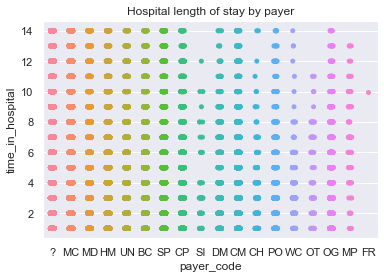

In [19]:
#stripplot graph to show the time spent in hospital by payer
sns.set(style='darkgrid')
plt.title('Hospital length of stay by payer')
sns.stripplot(x='payer_code', y='time_in_hospital', data=df2)
plt.show()

<AxesSubplot:xlabel='gender', ylabel='time_in_hospital'>

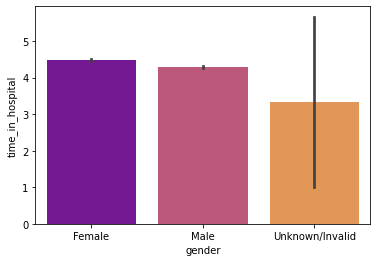

In [30]:
#barplot comparing genders to time spent in hospital
#Females lead males slightly in time spent in hospital
sns.barplot(x= 'gender', y='time_in_hospital', data=df2, palette = 'plasma')

<AxesSubplot:xlabel='gender', ylabel='num_procedures'>

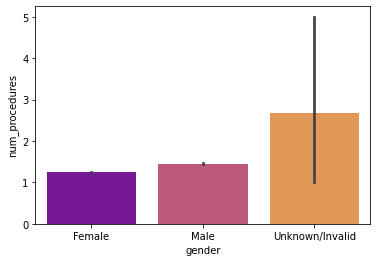

In [44]:
#barplot comparing genders to number of procedure, showing males slighlty higher than females. 
#Unknown gender has the highest count of procedures. 
sns.barplot(x= 'gender', y='num_procedures', data=df2, palette = 'plasma')

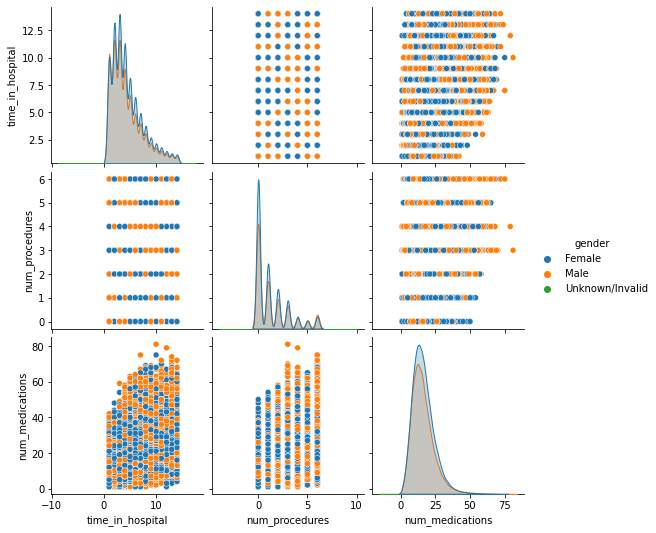

In [27]:
#pairplot graph by gender
sns.pairplot(df2, hue='gender')

#### This analysis shows women and men of age group 40-50 had very close numbers. The women stayed in the hospital slightly longer than males and took more medications. The men showed slightly a smaller number of procedures. The “unknown” gender group leads in the number of procedures, with males coming in second. It shows out of the 18 different payers, the “unknown” payer and Medicare leading in the length of time in hospital and counts of readmissions.